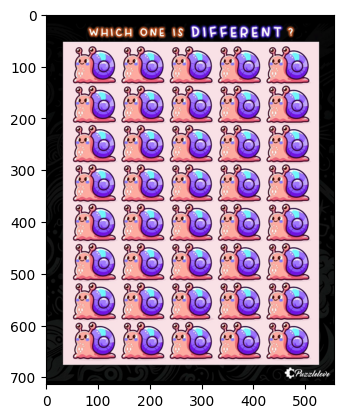

In [17]:


import cv2
import matplotlib.pyplot as plt
import numpy as np;
 
 
# read the image
image = cv2.imread('different_find.png')

plt.imshow(image)

In [18]:
# Display the image in a window
cv2.imshow('Image Window', image)

# Wait for a key press and close the window
cv2.waitKey(0)
cv2.destroyAllWindows()

cropping slakken

True

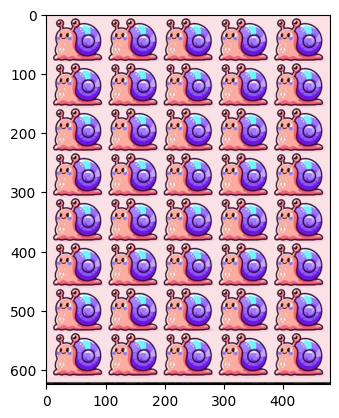

In [21]:
# Cropping an image
cropped_image = image[55:680, 40:520]
 
# Display cropped image
plt.imshow(cropped_image)
cv2.imwrite('cropped_slakken.png',cropped_image)
 

cropping enkele slak

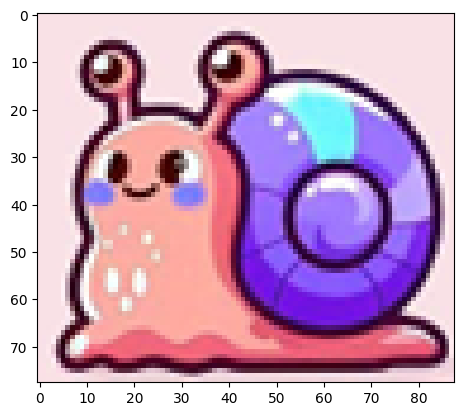

In [82]:
# Cropping an image
cropped_slak = image[58:136, 48:136]
 
 # save slak
 
cv2.imwrite('cropped_slak.png',cropped_slak)
# Display cropped image
plt.imshow(cropped_slak)
 

In [6]:
# convert the image to grayscale format
img_gray = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)

In [7]:
# apply binary thresholding
ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
# visualize the binary image
cv2.imshow('Binary image', thresh)
cv2.waitKey(0)

-1

In [85]:
# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
                                      
# draw contours on the original image
image_copy = cropped_image.copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=1, lineType=cv2.LINE_AA)
                
# see the results
cv2.imshow('None approximation', image_copy)
cv2.waitKey(0)
cv2.imwrite('contours_none_image1.jpg', image_copy)
cv2.destroyAllWindows()

find objects

In [86]:



# Load the main image and the template image
main_image = cv2.imread('different_find.png')
template = cv2.imread('cropped_slak.png', 0)

# Convert main image to grayscale
gray_main = cv2.cvtColor(main_image, cv2.COLOR_BGR2GRAY)

# Apply template matching
result = cv2.matchTemplate(gray_main, template, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# Draw a rectangle around the matched region
top_left = max_loc
h, w = template.shape
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(main_image, top_left, bottom_right, (0, 255, 0), 2)

# Display the result
cv2.imshow('Detected Template', main_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [87]:
# Load the image
image = cropped_image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(blurred, 50, 150)

# Find contours
contours, _ = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the image
cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

# Display the result
cv2.imshow('Contours', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [88]:
# Load the image
image =cropped_image
# Initialize the ORB detector
orb = cv2.ORB_create()

# Detect keypoints and descriptors
keypoints, descriptors = orb.detectAndCompute(image, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0))

# Display the result
cv2.imshow('Keypoints', image_with_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [95]:
# Load the image
image = cropped_image

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
keypoints, descriptors = sift.detectAndCompute(gray, None)

# Draw keypoints
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imshow('Keypoints', image_with_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Use Brute Force Matcher to match descriptors
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptors, descriptors)
matches = sorted(matches, key=lambda x: x.distance)

# Draw matches
matched_image = cv2.drawMatches(image, keypoints, image, keypoints, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
cv2.imshow('Matches', matched_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

object find with different objects

In [ ]:
# Load the image
image = cropped_image



# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding
_, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

# Find contours
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours
cv2.drawContours(image, contours, -1, (0, 255, 0), 2)
cv2.imshow('Contours', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Extract and compare objects
objects = [cv2.boundingRect(contour) for contour in contours]
sift = cv2.SIFT_create()
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

for i, (x, y, w, h) in enumerate(objects):
    obj1 = gray[y:y+h, x:x+w]
    kp1, des1 = sift.detectAndCompute(obj1, None)

    for j, (x2, y2, w2, h2) in enumerate(objects):
        if i >= j:
            continue
        obj2 = gray[y2:y2+h2, x2:x2+w2]
        kp2, des2 = sift.detectAndCompute(obj2, None)

        matches = bf.match(des1, des2)
        matches = sorted(matches, key=lambda x: x.distance)

        matched_image = cv2.drawMatches(obj1, kp1, obj2, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
        cv2.imshow(f'Matches between object {i+1} and object {j+1}', matched_image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        
        

zoek de slap die een afwijking heeft

In [ ]:
# Load the image
image = cv2.imread('cropped_slakken.png')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding
_, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

# Find contours
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours
cv2.drawContours(image, contours, -1, (0, 255, 0), 2)
cv2.imshow('Contours', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Find convexity defects
for contour in contours:
    hull = cv2.convexHull(contour, returnPoints=False)
    defects = cv2.convexityDefects(contour, hull)
    if defects is not None:
        for i in range(defects.shape[0]):
            s, e, f, d = defects[i, 0]
            start = tuple(contour[s][0])
            end = tuple(contour[e][0])
            far = tuple(contour[f][0])
            cv2.line(image, start, end, [0, 255, 0], 2)
            cv2.circle(image, far, 3, [0, 0, 255], -1)

cv2.imshow('Defects', image)
cv2.waitKey(0)
cv2.destroyAllWindows()